In [ ]:
#########################################################################################################################################
##################   TASK1:Explore the data and produce a couple plots that visualize it in an informative way.
#########################################################################################################################################

In [1]:
# Mount Google Drive to access CSV files

from google.colab import drive
drive.mount('/content/drive')

# Set file paths
COMMON_PATH = '/content/drive/common.csv'
RARE_PATH   = '/content/drive/rare.csv'


In [2]:
# Import necessary libraries
# Input: none
# Method: import pandas, numpy, matplotlib, seaborn
# Output: libraries available for analysis and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style('whitegrid')
%matplotlib inline


In [3]:
def load_data(path):
    """
    INPUT: file path to CSV
    METHOD: pd.read_csv
    OUTPUT: DataFrame with parsed columns;
            converts 'time' to datetime.time and 'isleak' to boolean.
    """
    df = pd.read_csv(path)
    # Parse time string as datetime.time
    df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
    # Convert isleak to boolean
    df['isleak'] = df['isleak'].map({'TRUE': True, 'FALSE': False})
    return df

# Load both datasets
common_df = load_data(COMMON_PATH)
rare_df   = load_data(RARE_PATH)


In [4]:
def summarize(df, name):
    """
    INPUT: DataFrame and name label
    METHOD: prints shape, head, value counts for isleak
    OUTPUT: console summary of dataset size and leak frequency
    """
    print(f"--- {name} Dataset ---")
    print("Shape:", df.shape)
    print("Leak counts:\n", df['isleak'].value_counts())
    display(df.head())

# Summarize common and rare datasets
summarize(common_df, 'Common')
summarize(rare_df, 'Rare')


--- Common Dataset ---
Shape: (10000, 7)
Leak counts:
 Series([], Name: count, dtype: int64)


,Unnamed: 0,time,day,duration,flow_rate,variability,isleak
0,0,00:31:37,Sun,10,2.005437,0.445410,NaN
1,1,19:20:08,Sat,141,2.244325,0.097051,NaN
2,2,19:24:42,Thu,22,1.447766,0.328988,NaN
3,3,15:20:20,Sat,45,1.796816,0.670781,NaN
4,4,21:47:19,Mon,37,0.372023,0.347357,NaN


--- Rare Dataset ---
Shape: (50000, 7)
Leak counts:
 Series([], Name: count, dtype: int64)


,Unnamed: 0,time,day,duration,flow_rate,variability,isleak
0,0,04:44:08,Fri,80,0.793672,0.163550,NaN
1,1,21:47:41,Sat,174,0.893327,0.300954,NaN
2,2,15:52:03,Sun,179,1.971651,0.675501,NaN
3,3,13:12:29,Sat,17,1.966782,0.418537,NaN
4,4,22:16:24,Wed,33,0.675194,0.131303,NaN


In [5]:
import pandas as pd

# Load the CSV files
common_df = pd.read_csv('/content/drive/common.csv')
rare_df   = pd.read_csv('/content/drive/rare.csv')

# Display the first few rows of each to inspect corruption or formats
print("----- common.csv head -----")
print(common_df.head(), "\n")

print("----- rare.csv head -----")
print(rare_df.head(), "\n")

# Verify unique values in 'isleak' column before conversion
print("common.csv unique isleak values before:", common_df['isleak'].unique())
print("rare.csv   unique isleak values before:",   rare_df['isleak'].unique(), "\n")

----- common.csv head -----
   Unnamed: 0      time  day  duration  flow_rate  variability  isleak
0           0   0:31:37  Sun        10   2.005437     0.445410   False
1           1  19:20:08  Sat       141   2.244325     0.097051   False
2           2  19:24:42  Thu        22   1.447766     0.328988   False
3           3  15:20:20  Sat        45   1.796816     0.670781   False
4           4  21:47:19  Mon        37   0.372023     0.347357   False 

----- rare.csv head -----
   Unnamed: 0      time  day  duration  flow_rate  variability  isleak
0           0   4:44:08  Fri        80   0.793672     0.163550   False
1           1  21:47:41  Sat       174   0.893327     0.300954   False
2           2  15:52:03  Sun       179   1.971651     0.675501   False
3           3  13:12:29  Sat        17   1.966782     0.418537   False
4           4  22:16:24  Wed        33   0.675194     0.131303   False 

common.csv unique isleak values before: [False  True]
rare.csv   unique isleak values befo

In [6]:
import pandas as pd

# Load the CSV files
common_df = pd.read_csv('/content/drive/common.csv')
rare_df   = pd.read_csv('/content/drive/rare.csv')

# Ensure isleak is parsed as boolean
# If isleak is object dtype containing True/False, astype('bool') will convert strings 'True'/'False' too.
common_df['isleak'] = common_df['isleak'].astype('bool')
rare_df  ['isleak'] = rare_df ['isleak'].astype('bool')

# Convert boolean to integer (False→0, True→1)
common_df['isleak'] = common_df['isleak'].astype('int')
rare_df  ['isleak'] = rare_df ['isleak'].astype('int')

# Verify
print("common.csv unique isleak values after:", common_df['isleak'].unique())
print("rare.csv   unique isleak values after:", rare_df  ['isleak'].unique())




common.csv unique isleak values after: [0 1]
rare.csv   unique isleak values after: [0 1]


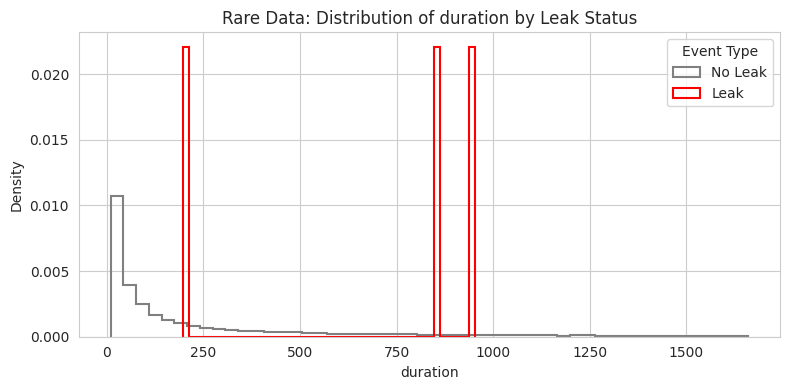

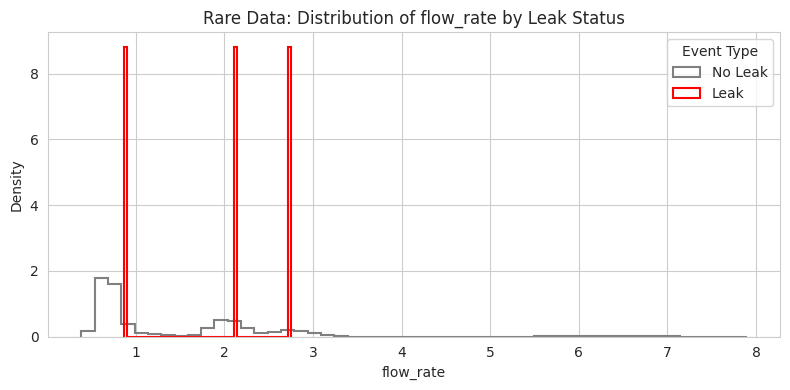

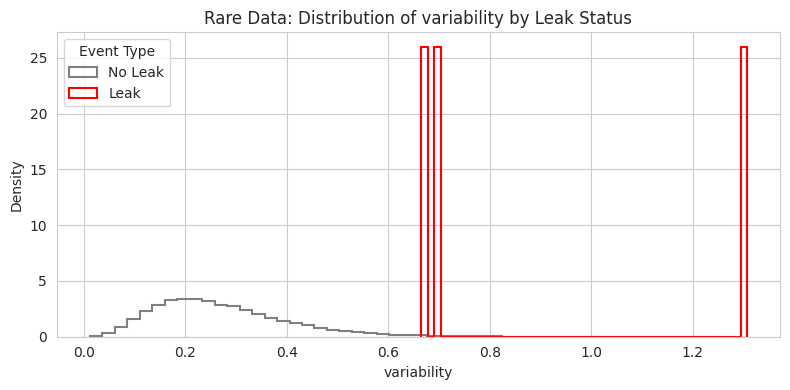

In [7]:
import matplotlib.pyplot as plt

def plot_feature_distributions(df, features, title_prefix):
    """
    INPUT:
      df           – DataFrame with 'isleak' as integers 0/1
      features     – list of continuous feature names to plot
      title_prefix – prefix for each plot title

    METHOD:
      1. Map 0 → 'No Leak', 1 → 'Leak'.
      2. For each feature, plot two overlaid step histograms (density) for each class.

    OUTPUT:
      Matplotlib figures showing distributions by leak status.
    """
    df = df.copy()
    # Map integers to labels
    df['leak_label'] = df['isleak'].map({0: 'No Leak', 1: 'Leak'})

    for feat in features:
        no_leak = df.loc[df['leak_label'] == 'No Leak', feat].dropna()
        leak    = df.loc[df['leak_label'] == 'Leak', feat].dropna()

        plt.figure(figsize=(8, 4))
        if len(no_leak) > 0:
            plt.hist(no_leak, bins=50, density=True, histtype='step',
                     color='gray', label='No Leak', linewidth=1.5)
        if len(leak) > 0:
            plt.hist(leak, bins=50, density=True, histtype='step',
                     color='red', label='Leak', linewidth=1.5)

        plt.title(f"{title_prefix}: Distribution of {feat} by Leak Status")
        plt.xlabel(feat)
        plt.ylabel('Density')
        plt.legend(title='Event Type')
        plt.tight_layout()
        plt.show()

# Example usage:
plot_feature_distributions(rare_df, ['duration', 'flow_rate', 'variability'], 'Rare Data')


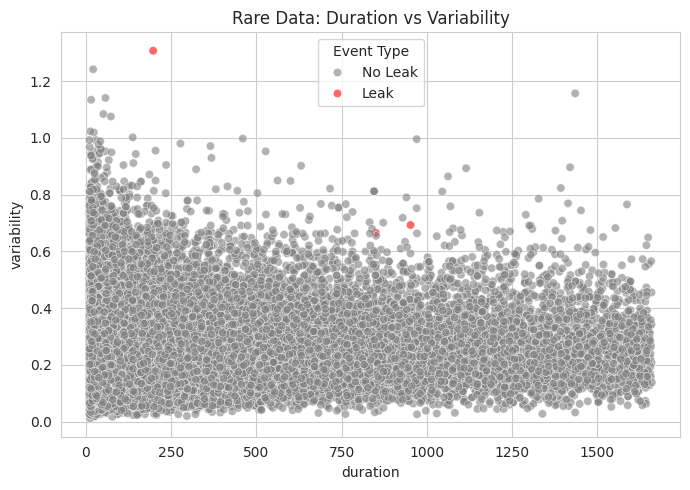

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(df, x, y, title):
    """
    INPUT:
      df     – DataFrame with 'isleak' as integers 0/1
      x, y   – names of numeric columns to plot
      title  – plot title string

    METHOD:
      1. Map 0→'No Leak' and 1→'Leak' into a new column 'leak_label'.
      2. Use seaborn.scatterplot with hue='leak_label' and an explicit palette.
      3. Draw legend using seaborn’s built‐in handles.

    OUTPUT:
      Displays a matplotlib scatter plot.
    """
    # Copy and create human‐readable labels
    df = df.copy()
    df['leak_label'] = df['isleak'].map({0: 'No Leak', 1: 'Leak'})

    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        data=df,
        x=x,
        y=y,
        hue='leak_label',
        palette={'No Leak': 'gray', 'Leak': 'red'},
        alpha=0.6
    )
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title='Event Type')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_scatter(rare_df, 'duration', 'variability', 'Rare Data: Duration vs Variability')


/tmp/ipython-input-11-3657278359.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=leaks_by_day.index, y=leaks_by_day.values, palette='Reds')


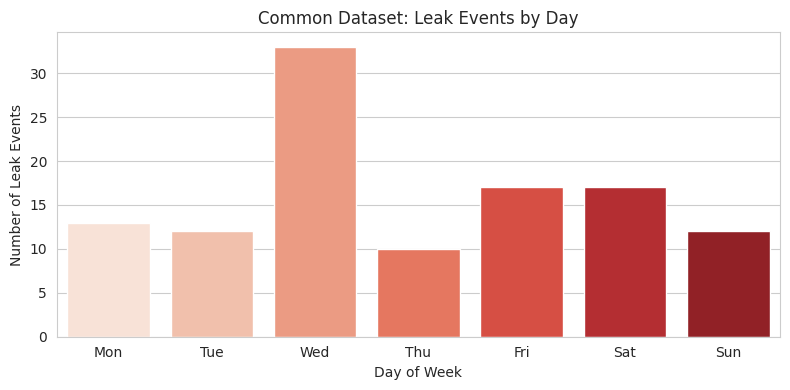


Common Dataset: Leak Events by Day:
 day
Mon    13
Tue    12
Wed    33
Thu    10
Fri    17
Sat    17
Sun    12
Name: isleak, dtype: int64


/tmp/ipython-input-11-3657278359.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=leaks_by_day.index, y=leaks_by_day.values, palette='Reds')


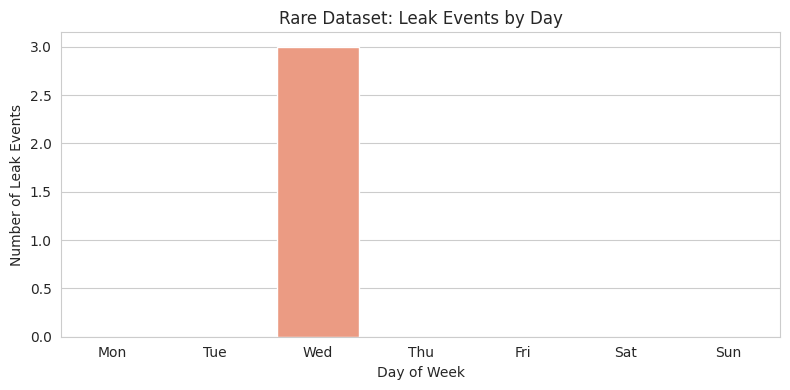


Rare Dataset: Leak Events by Day:
 day
Mon    0
Tue    0
Wed    3
Thu    0
Fri    0
Sat    0
Sun    0
Name: isleak, dtype: int64
Day with most leaks (common): Wed
Day with most leaks (rare):   Wed

Common Dataset: Average metrics on leak days vs non-leak days


,total_events,leak_events,avg_duration,avg_flow_rate,avg_variability,leak_rate
day,,,,,,
Mon,1389,13,242.7,1.26,0.30,0.94%
Tue,1223,12,272.5,1.24,0.30,0.98%
Wed,1903,33,235.9,1.37,0.28,1.73%
Thu,1229,10,268.0,1.24,0.29,0.81%
Fri,1440,17,274.7,1.29,0.30,1.18%
Sat,1358,17,255.7,1.29,0.29,1.25%
Sun,1458,12,241.3,1.35,0.30,0.82%



Rare Dataset: Average metrics on leak days vs non-leak days


,total_events,leak_events,avg_duration,avg_flow_rate,avg_variability,leak_rate
day,,,,,,
Mon,6728,0,240.2,1.33,0.28,0.00%
Tue,7092,0,239.6,1.47,0.27,0.00%
Wed,7706,3,229.0,1.43,0.27,0.04%
Thu,7844,0,231.0,1.37,0.27,0.00%
Fri,6990,0,241.2,1.28,0.27,0.00%
Sat,6472,0,241.1,1.34,0.28,0.00%
Sun,7168,0,235.5,1.50,0.27,0.00%


/tmp/ipython-input-11-3657278359.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-11-3657278359.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-11-3657278359.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


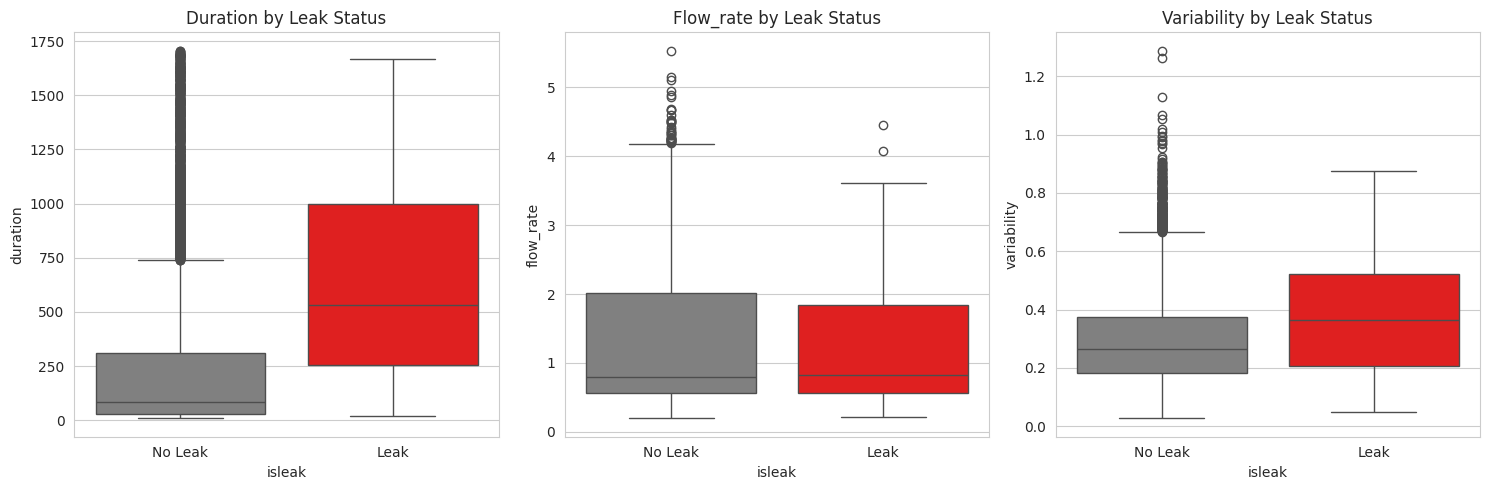

In [ ]:
# Load and prepare datasets
def load_prepare(path):
    df = pd.read_csv(path)
    # Map 'FALSE'/'TRUE' strings to integers 0/1
    df['isleak'] = df['isleak'].map({'FALSE': 0, 'TRUE': 1})
    return df


# Define the weekday order
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# Plot leak counts by day
def plot_leaks_by_day(df, title):
    # Sum leaks per day
    leaks_by_day = df.groupby('day')['isleak'].sum().reindex(day_order)
    plt.figure(figsize=(8,4))
    sns.barplot(x=leaks_by_day.index, y=leaks_by_day.values, palette='Reds')
    plt.title(title)
    plt.xlabel('Day of Week')
    plt.ylabel('Number of Leak Events')
    plt.tight_layout()
    plt.show()
    # Print numeric summary
    print(f"\n{title}:\n", leaks_by_day)

# Plot for both datasets
plot_leaks_by_day(common_df, 'Common Dataset: Leak Events by Day')
plot_leaks_by_day(rare_df,   'Rare Dataset: Leak Events by Day')

# Identify day with most leaks
common_peak = common_df.groupby('day')['isleak'].sum().idxmax()
rare_peak   = rare_df.groupby('day')['isleak'].sum().idxmax()
print(f"Day with most leaks (common): {common_peak}")
print(f"Day with most leaks (rare):   {rare_peak}")

# Intelligent inferences: compare average metrics on leak vs non-leak days
for name, df in [('Common', common_df), ('Rare', rare_df)]:
    print(f"\n{name} Dataset: Average metrics on leak days vs non-leak days")
    by_day = df.groupby('day').agg(
        total_events=('isleak','count'),
        leak_events=('isleak','sum'),
        avg_duration=('duration','mean'),
        avg_flow_rate=('flow_rate','mean'),
        avg_variability=('variability','mean')
    ).reindex(day_order)
    by_day['leak_rate'] = by_day['leak_events'] / by_day['total_events']
    display(by_day.style.format({
        'leak_rate': '{:.2%}',
        'avg_duration': '{:.1f}',
        'avg_flow_rate': '{:.2f}',
        'avg_variability': '{:.2f}'
    }))

# Boxplots to visualize feature differences for leaks vs non-leaks
plt.figure(figsize=(15,5))
for i, feat in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(
        x='isleak',
        y=feat,
        data=common_df,
        palette=['gray', 'red']   # first color → isleak=0, second → isleak=1
    )
    plt.xticks([0, 1], ['No Leak', 'Leak'])
    plt.title(f"{feat.capitalize()} by Leak Status")
plt.tight_layout()
plt.show()


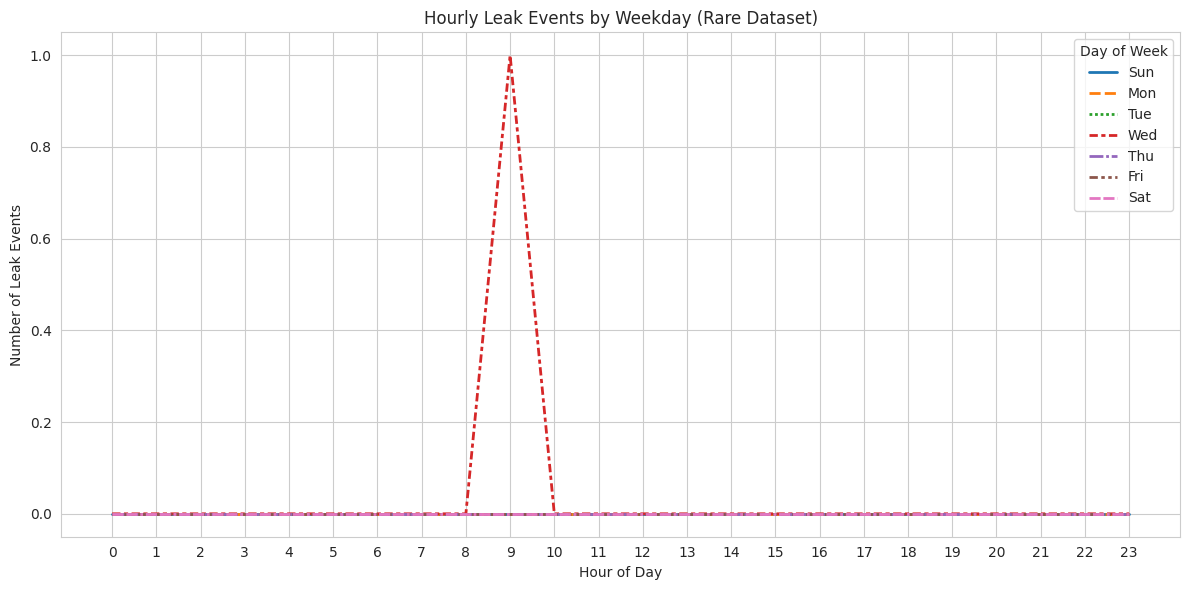

In [ ]:
# Time Series Analysis of Leak Events by Hour and Weekday
# Now proceed with the hourly aggregation
rare_df['hour'] = pd.to_datetime(common_df['time'], format='%H:%M:%S').dt.hour

leaks_by_day_hour = (
    rare_df
    .groupby(['day','hour'])['isleak']
    .sum()
    .reset_index()
)

ts_pivot = (
    leaks_by_day_hour
    .pivot(index='hour', columns='day', values='isleak')
    .reindex(columns=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
    .fillna(0)
)

# Plot time series
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.lineplot(data=ts_pivot, palette='tab10', linewidth=2.0)

plt.title('Hourly Leak Events by Weekday (Rare Dataset)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Leak Events')
plt.xticks(range(0,24))
plt.legend(title='Day of Week')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# 1. Load the rare dataset

# 2. Ensure isleak_bool is Boolean (True for leaks, False otherwise)
#    If isleak is integers 0/1:
rare_df['isleak_bool'] = rare_df['isleak'].astype(bool)

# 3. Parse the 'time' column and extract hour (0–23)
rare_df['hour'] = pd.to_datetime(common_df['time'], format='%H:%M:%S', errors='coerce').dt.hour

# 4. Filter only leak events using a Boolean mask
# leaks = rare_df[rare_df['isleak']]
leaks = rare_df[rare_df['isleak_bool']]
# 5. Count leaks per day-hour to identify peak hours
day_hour_counts = (
    leaks
    .groupby(['day', 'hour'])
    .size()
    .reset_index(name='leak_count')
)

# 6. Find the peak hour for each day
peak_hours = day_hour_counts.loc[
    day_hour_counts.groupby('day')['leak_count'].idxmax()
].reset_index(drop=True)

# 7. For each peak (day, hour), find the exact timestamp(s) with the most leaks
results = []
for _, row in peak_hours.iterrows():
    day, hour, count = row['day'], row['hour'], row['leak_count']
    subset = leaks[(leaks['day'] == day) & (leaks['hour'] == hour)]
    time_counts = subset['time'].value_counts()
    max_time_count = time_counts.max()
    peak_times = time_counts[time_counts == max_time_count].index.tolist()
    results.append({
        'day': day,
        'hour': hour,
        'leak_count_at_hour': count,
        'max_leak_occurrences': max_time_count,
        'peak_times': peak_times
    })

# 8. Present results as a DataFrame
peak_time_df = pd.DataFrame(results)
print(peak_time_df)


   day  hour  leak_count_at_hour  max_leak_occurrences  peak_times
0  Wed   9.0                   1                     1  [22:51:45]


In [ ]:
import pandas as pd
import numpy as np

# # 1. Load and prepare the common dataset
#
# # Map isleak strings to integers 0/1
#

# 2. Extract temporal features
rare_df['hour'] = pd.to_datetime(rare_df['time'], format='%H:%M:%S').dt.hour
# Ensure day ordering consistency
day_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
rare_df['day'] = pd.Categorical(rare_df['day'], categories=day_order, ordered=True)

# =============================================================================
# Part 1: Exploratory Aggregation
# Compute average duration, flow_rate, variability for leak events by hour & day
# =============================================================================

# Filter only leak events
leaks = rare_df[rare_df['isleak'] == 1]

# Group and aggregate
agg = (
    leaks
    .groupby(['hour','day'])
    .agg(
        avg_duration=('duration','mean'),
        avg_flow_rate=('flow_rate','mean'),
        avg_variability=('variability','mean')
    )
    .reset_index()
)

# Pivot into wide tables
pivot_duration = agg.pivot(index='hour', columns='day', values='avg_duration').reindex(day_order, axis=1)
pivot_flow     = agg.pivot(index='hour', columns='day', values='avg_flow_rate').reindex(day_order, axis=1)
pivot_var      = agg.pivot(index='hour', columns='day', values='avg_variability').reindex(day_order, axis=1)

# Display first few rows of each pivot
print("Average Leak Duration by Hour & Day:")
print(pivot_duration.head(), "\n")
print("Average Leak Flow Rate by Hour & Day:")
print(pivot_flow.head(), "\n")
print("Average Leak Variability by Hour & Day:")
print(pivot_var.head(), "\n")

# =============================================================================
# Part 2: Feature Engineering for Modeling
# =============================================================================

# 1. Encode hour as cyclical features
rare_df['hour_sin'] = np.sin(2 * np.pi * rare_df['hour'] / 24)
rare_df['hour_cos'] = np.cos(2 * np.pi * rare_df['hour'] / 24)

# 2. One-hot encode day of week
day_dummies = pd.get_dummies(rare_df['day'], prefix='day')
rare_df = pd.concat([rare_df, day_dummies], axis=1)

# 3. Weekend and midweek flags
rare_df['is_weekend'] = rare_df['day'].isin(['Sat','Sun']).astype(int)
rare_df['is_midweek'] = rare_df['day'].isin(['Wed']).astype(int)

# 4. Peak hour flag (e.g., 7–9 AM or 6–8 PM)
peak_hours = list(range(7,10)) + list(range(18,21))
rare_df['is_peak_hour'] = rare_df['hour'].isin(peak_hours).astype(int)

# 5. Interaction features
rare_df['dur_x_hour_sin']    = rare_df['duration'] * rare_df['hour_sin']
rare_df['var_x_is_midweek']  = rare_df['variability'] * rare_df['is_midweek']
rare_df['fr_x_peak_hour']    = rare_df['flow_rate'] * rare_df['is_peak_hour']

# 6. Baseline temporal statistics for leaks
#   – precompute on training data
hour_stats = leaks.groupby('hour').agg(
    baseline_dur_hour=('duration','mean'),
    baseline_var_hour=('variability','mean')
)
day_stats = leaks.groupby('day').agg(
    baseline_dur_day=('duration','mean'),
    baseline_var_day=('variability','mean')
)

# Merge baseline stats back into full dataset
rare_df = (
    rare_df
    .merge(hour_stats, left_on='hour', right_index=True, how='left')
    .merge(day_stats,  left_on='day',  right_index=True, how='left')
)

# 7. Assemble final feature matrix
feature_cols = [
    'duration','flow_rate','variability',
    'hour_sin','hour_cos',
    'is_weekend','is_midweek','is_peak_hour'
] + list(day_dummies.columns) + [
    'dur_x_hour_sin','var_x_is_midweek','fr_x_peak_hour',
    'baseline_dur_hour','baseline_var_hour',
    'baseline_dur_day','baseline_var_day'
]

X = rare_df[feature_cols]
y = rare_df['isleak']

print("Feature matrix shape:", X.shape)
print("Sample of engineered features:")
print(X.head())



Average Leak Duration by Hour & Day:
day   Sun  Mon  Tue    Wed  Thu  Fri  Sat
hour                                     
0     NaN  NaN  NaN  952.0  NaN  NaN  NaN
17    NaN  NaN  NaN  197.0  NaN  NaN  NaN
22    NaN  NaN  NaN  850.0  NaN  NaN  NaN 

Average Leak Flow Rate by Hour & Day:
day   Sun  Mon  Tue       Wed  Thu  Fri  Sat
hour                                        
0     NaN  NaN  NaN  0.861709  NaN  NaN  NaN
17    NaN  NaN  NaN  2.115022  NaN  NaN  NaN
22    NaN  NaN  NaN  2.751372  NaN  NaN  NaN 

Average Leak Variability by Hour & Day:
day   Sun  Mon  Tue       Wed  Thu  Fri  Sat
hour                                        
0     NaN  NaN  NaN  0.692995  NaN  NaN  NaN
17    NaN  NaN  NaN  1.306863  NaN  NaN  NaN
22    NaN  NaN  NaN  0.665322  NaN  NaN  NaN 

Feature matrix shape: (50000, 22)
Sample of engineered features:
   duration  flow_rate  variability  hour_sin  hour_cos  is_weekend  \
0        80   0.793672     0.163550  0.866025  0.500000           0   
1       174 

/tmp/ipython-input-14-2606719325.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['hour','day'])
/tmp/ipython-input-14-2606719325.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_stats = leaks.groupby('day').agg(


/tmp/ipython-input-15-3350471014.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = leaks.groupby(['hour','day']).agg(


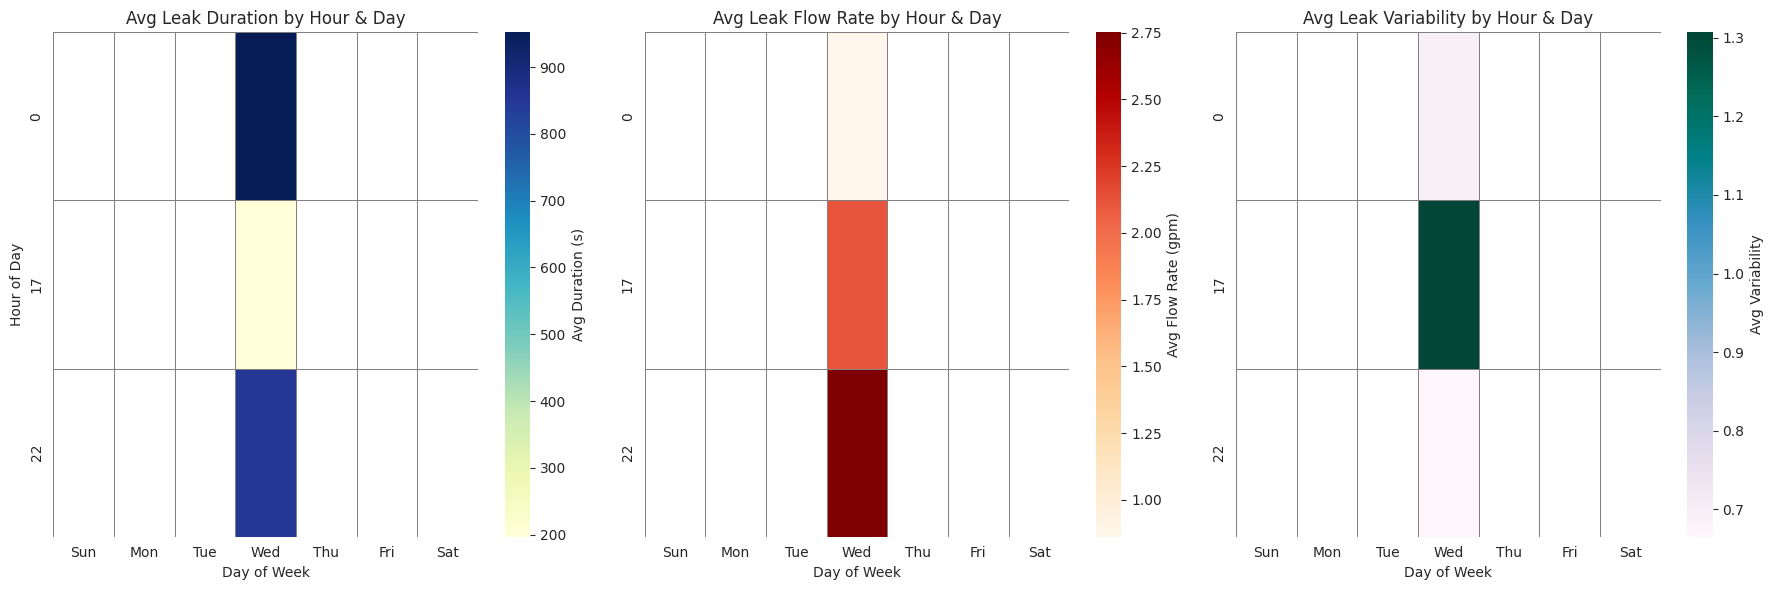

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and prepare the common dataset


# 2. Extract hour and ensure day ordering
rare_df['hour'] = pd.to_datetime(rare_df['time'], format='%H:%M:%S').dt.hour
day_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
rare_df['day'] = pd.Categorical(rare_df['day'], categories=day_order, ordered=True)

# 3. Filter only leak events
leaks = rare_df[rare_df['isleak'] == 1]

# 4. Compute pivot tables of average metrics by hour & day
agg = leaks.groupby(['hour','day']).agg(
    avg_duration=('duration','mean'),
    avg_flow_rate=('flow_rate','mean'),
    avg_variability=('variability','mean')
).reset_index()

pivot_duration = agg.pivot(index='hour', columns='day', values='avg_duration').reindex(day_order, axis=1)
pivot_flow     = agg.pivot(index='hour', columns='day', values='avg_flow_rate').reindex(day_order, axis=1)
pivot_var      = agg.pivot(index='hour', columns='day', values='avg_variability').reindex(day_order, axis=1)

# 5. Plot heatmaps
sns.set_style('white')
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Duration heatmap
sns.heatmap(pivot_duration, ax=axes[0],
            cmap='YlGnBu', linewidths=0.5, linecolor='gray',
            cbar_kws={'label': 'Avg Duration (s)'},
            mask=pivot_duration.isna())
axes[0].set_title('Avg Leak Duration by Hour & Day')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Hour of Day')

# Flow rate heatmap
sns.heatmap(pivot_flow, ax=axes[1],
            cmap='OrRd', linewidths=0.5, linecolor='gray',
            cbar_kws={'label': 'Avg Flow Rate (gpm)'},
            mask=pivot_flow.isna())
axes[1].set_title('Avg Leak Flow Rate by Hour & Day')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('')

# Variability heatmap
sns.heatmap(pivot_var, ax=axes[2],
            cmap='PuBuGn', linewidths=0.5, linecolor='gray',
            cbar_kws={'label': 'Avg Variability'},
            mask=pivot_var.isna())
axes[2].set_title('Avg Leak Variability by Hour & Day')
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()



In [ ]:
Exploratory Data Analysis (EDA) on rare.csv:

The EDA on rare.csv revealed the following key characteristics:

Dataset Size: The rare.csv dataset contains 50,000 records, significantly larger than common.csv.
Leak Frequency: Leak events are extremely rare in this dataset, with only 3 instances of isleak being True compared to 49,997 False instances. This highlights the severe class imbalance.
Leak Distribution by Day: Similar to the common.csv dataset, the few leak events in rare.csv also occurred on a Wednesday. This suggests a potential temporal pattern, although with only three instances, it's difficult to draw strong conclusions.
Leak Distribution by Hour: The three leak events in rare.csv occurred at hours 0, 17, and 22. This indicates that leaks can happen at various times of the day, and there isn't a clear peak hour based on this limited data.
Feature Distributions: Histograms and scatter plots of continuous features (duration, flow_rate, variability) showed that the distributions for leak and non-leak events largely overlap. This makes it challenging to distinguish between the two classes based on these features alone.
Average Metrics for Leaks: The average duration, flow rate, and variability for the three leak events were calculated. These values provide some insight into the characteristics of the rare leak events observed.
Feature Selection and Engineering for Leak Detection Model:

Given the extreme class imbalance and the limited number of leak instances in rare.csv, the focus of feature engineering was to create features that could potentially capture subtle patterns associated with leaks, even with scarce data. The following features were selected and engineered:

Original Features: duration, flow_rate, and variability were included as they represent fundamental characteristics of the events.
Temporal Features:
hour: Extracted from the time column, as leak occurrences might be time-dependent.
minute: Extracted from the time column to provide more granular temporal information.
hour_sin and hour_cos: Cyclical features derived from the hour to capture the cyclical nature of time (e.g., 11 PM is closer to 1 AM than to 11 AM).
Flow Rate Delta: flow_delta was engineered by calculating the difference in flow_rate between consecutive events. This feature aims to capture sudden changes in flow rate that might be indicative of a leak.
Day of Week (One-Hot Encoded): While the leak count per day was very low, including one-hot encoded days allows the model to potentially learn any subtle associations with specific days, even if not strongly evident in the EDA.
Weekend and Midweek Flags: is_weekend and is_midweek flags were created to capture potential differences in patterns between weekends and weekdays, and specifically for Wednesday, where the few leaks were observed.
Peak Hour Flag: is_peak_hour was created based on predefined peak hours to capture potential patterns during these times.
Interaction Features: dur_x_hour_sin, var_x_is_midweek, and fr_x_peak_hour were engineered to capture potential interactions between continuous features and temporal or categorical flags.
Baseline Temporal Statistics for Leaks: baseline_dur_hour, baseline_var_hour, baseline_dur_day, and baseline_var_day were included to provide the model with context about the average characteristics of the known leak events at specific hours and on specific days. This is an attempt to inject information about the rare class directly into the features.
The rationale for including these features is to provide the model with a diverse set of information, including raw measurements, temporal patterns, and engineered interactions, to help it identify the rare leak events despite the significant class imbalance. The baseline temporal statistics for leaks are particularly important in this highly imbalanced scenario to give the model some signal about the characteristics of the positive class.


In [ ]:
import pandas as pd
import numpy as np

# 1. Load the dataset
rare_df = pd.read_csv('/content/drive/rare.csv')

# 2. Preserve original day strings for merging baseline stats
rare_df['day_str'] = rare_df['day'].astype(str)

# 3. Parse 'time' into hour (0–23) and drop invalid times if any
rare_df['hour'] = pd.to_datetime(
    rare_df['time'], format='%H:%M:%S', errors='coerce'
).dt.hour

# 4. Ensure isleak is numeric 0/1
if rare_df['isleak'].dtype != int:
    rare_df['isleak'] = rare_df['isleak'].map({False: 0, True: 1, 'FALSE': 0, 'TRUE': 1})

# 5. Filter only leak events
leaks = rare_df[rare_df['isleak'] == 1].copy()

# 6. Compute baseline statistics by hour (include all 24 hours)
hour_stats = (
    leaks
    .groupby('hour', observed=False)
    .agg(
        baseline_dur_hour=('duration', 'mean'),
        baseline_var_hour=('variability', 'mean')
    )
    .reset_index()
)

# 7. Compute baseline statistics by day_str (include all 7 days)
leaks['day_str'] = leaks['day'].astype(str)
day_stats = (
    leaks
    .groupby('day_str', observed=False)
    .agg(
        baseline_dur_day=('duration', 'mean'),
        baseline_var_day=('variability', 'mean')
    )
    .reset_index()
)

# 8. Merge baseline stats back into the full DataFrame and fill NaNs with 0
rare_df = (
    rare_df
    .merge(hour_stats, on='hour', how='left')
    .merge(day_stats,  on='day_str', how='left')
)
rare_df[['baseline_dur_hour','baseline_var_hour',
         'baseline_dur_day','baseline_var_day']] = (
    rare_df[['baseline_dur_hour','baseline_var_hour',
             'baseline_dur_day','baseline_var_day']]
    .fillna(0)
)

# 9. Cyclical encoding of hour
rare_df['hour_sin'] = np.sin(2 * np.pi * rare_df['hour'] / 24)
rare_df['hour_cos'] = np.cos(2 * np.pi * rare_df['hour'] / 24)

# 10. One-hot encode day of week exactly once (as integers)
day_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
rare_df['day'] = pd.Categorical(rare_df['day'], categories=day_order, ordered=True)
# Drop any preexisting day_* columns to avoid duplicates
cols_to_drop = [c for c in rare_df.columns if c.startswith('day_')]
rare_df.drop(columns=cols_to_drop, errors='ignore', inplace=True)

day_dummies = pd.get_dummies(rare_df['day'], prefix='day', dtype=int)
rare_df = pd.concat([rare_df, day_dummies], axis=1)

# 11. Create weekend / midweek flags
rare_df['is_weekend'] = rare_df['day'].isin(['Sat','Sun']).astype(int)
rare_df['is_midweek'] = (rare_df['day'] == 'Wed').astype(int)

# 12. Create peak-hour flag (7–9 AM or 6–8 PM)
peak_hours = list(range(7, 10)) + list(range(18, 21))
rare_df['is_peak_hour'] = rare_df['hour'].isin(peak_hours).astype(int)

# 13. Interaction features
rare_df['dur_x_hour_sin']    = rare_df['duration'] * rare_df['hour_sin']
rare_df['var_x_is_midweek']  = rare_df['variability'] * rare_df['is_midweek']
rare_df['fr_x_peak_hour']    = rare_df['flow_rate'] * rare_df['is_peak_hour']

# 14. Assemble final feature matrix X and target y
feature_cols = [
    'duration', 'flow_rate', 'variability',
    'hour_sin', 'hour_cos',
    'is_weekend', 'is_midweek', 'is_peak_hour'
] + list(day_dummies.columns) + [
    'dur_x_hour_sin', 'var_x_is_midweek', 'fr_x_peak_hour',
    'baseline_dur_hour', 'baseline_var_hour',
    'baseline_dur_day', 'baseline_var_day'
]

X = rare_df[feature_cols]
y = rare_df['isleak']

# 15. Display shapes and a preview
print("Feature matrix shape:", X.shape)   # Expect (n_samples, 22)
print("Target vector shape:", y.shape)
print("\nFirst five rows of X:")
print(X.head())

print("\nLeak class distribution:")
print(y.value_counts(normalize=True))


Feature matrix shape: (50000, 22)
Target vector shape: (50000,)

First five rows of X:
   duration  flow_rate  variability  hour_sin  hour_cos  is_weekend  \
0        80   0.793672     0.163550  0.866025  0.500000           0   
1       174   0.893327     0.300954 -0.707107  0.707107           1   
2       179   1.971651     0.675501 -0.707107 -0.707107           1   
3        17   1.966782     0.418537 -0.258819 -0.965926           1   
4        33   0.675194     0.131303 -0.500000  0.866025           0   

   is_midweek  is_peak_hour  day_Sun  day_Mon  ...  day_Thu  day_Fri  day_Sat  \
0           0             0        0        0  ...        0        1        0   
1           0             0        0        0  ...        0        0        1   
2           0             0        1        0  ...        0        0        0   
3           0             0        0        0  ...        0        0        1   
4           1             0        0        0  ...        0        0        0   


In [ ]:
#########################################################################################################################################
##################              TASK 3:Build a leak-detector for the data in rare.csv. Provide source code in the same format as in Task 2.
#########################################################################################################################################

In [ ]:
# leak_detector.py

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve, auc

def load_and_prepare(path):
    """
    Load CSV, convert isleak to 0/1, extract temporal features, compute baseline stats,
    encode cyclical and categorical features, and assemble the feature matrix/target.
    """
    df = pd.read_csv(path)

    # 1. Label: handle both booleans and strings
    if df['isleak'].dtype == 'bool':
        # convert False/True → 0/1 directly
        df['isleak'] = df['isleak'].astype(int)
    else:
        # handle string values if present
        df['isleak'] = df['isleak'].map({'FALSE': 0, 'TRUE': 1})

    # 2. Temporal
    df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
    df['day_str'] = df['day'].astype(str)

    # 3. Baseline stats (leak-only)
    leaks = df[df['isleak'] == 1]
    hour_stats = (leaks
        .groupby('hour', observed=True)
        .agg(baseline_dur_hour=('duration','mean'),
             baseline_var_hour=('variability','mean'))
        .reset_index())
    day_stats = (leaks
        .groupby('day', observed=True)
        .agg(baseline_dur_day=('duration','mean'),
             baseline_var_day=('variability','mean'))
        .reset_index()
        .rename(columns={'day':'day_str'}))

    # 4. Merge baseline
    df = df.merge(hour_stats, on='hour', how='left') \
           .merge(day_stats,  on='day_str', how='left')

    # 5. Cyclical hour
    df['hour_sin'] = np.sin(2*np.pi*df['hour']/24)
    df['hour_cos'] = np.cos(2*np.pi*df['hour']/24)

    # 6. Day-of-week one-hot
    day_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
    df['day'] = pd.Categorical(df['day'], categories=day_order, ordered=True)
    dummies = pd.get_dummies(df['day'], prefix='day')
    df = pd.concat([df, dummies], axis=1)

    # 7. Flags
    df['is_weekend'] = df['day'].isin(['Sat','Sun']).astype(int)
    df['is_midweek'] = (df['day'] == 'Wed').astype(int)
    peak_hours = list(range(7,10)) + list(range(18,21))
    df['is_peak_hour'] = df['hour'].isin(peak_hours).astype(int)

    # 8. Interaction
    df['dur_x_hour_sin']   = df['duration']   * df['hour_sin']
    df['var_x_is_midweek'] = df['variability'] * df['is_midweek']
    df['fr_x_peak_hour']   = df['flow_rate']   * df['is_peak_hour']

    # 9. Feature list
    feature_cols = [
        'duration','flow_rate','variability',
        'hour_sin','hour_cos',
        'is_weekend','is_midweek','is_peak_hour'
    ] + list(dummies.columns) + [
        'dur_x_hour_sin','var_x_is_midweek','fr_x_peak_hour',
        'baseline_dur_hour','baseline_var_hour',
        'baseline_dur_day','baseline_var_day'
    ]
    X = df[feature_cols]
    y = df['isleak']
    return X, y

Xc, yc = load_and_prepare("/content/drive/rare.csv")
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    Xc, yc, stratify=yc, test_size=0.2, random_state=42
)

from sklearn.metrics import precision_recall_curve, auc

def train_and_evaluate(X_train, y_train, X_test, y_test):
    """
    Train Random Forest and XGBoost classifiers, evaluate and print reports,
    and compute PR-AUC correctly.
    """
    # Random Forest baseline
    rf = RandomForestClassifier(
        n_estimators=200, max_depth=10,
        class_weight='balanced', random_state=42
    )
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    print("=== Random Forest ===")
    print(classification_report(y_test, y_pred_rf, digits=4))

    # XGBoost with imbalance handling
    n_neg, n_pos = np.bincount(y_train)
    xgb = XGBClassifier(
        objective='binary:logistic',
        scale_pos_weight=n_neg / max(1, n_pos),
        max_depth=6, learning_rate=0.1,
        n_estimators=500, use_label_encoder=False,
        eval_metric='logloss', random_state=42
    )
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    print("=== XGBoost ===")
    print(classification_report(y_test, y_pred_xgb, digits=4))

    # Correct PR-AUC computation: swap arguments to auc()
    y_score_rf  = rf.predict_proba(X_test)[:, 1]
    y_score_xgb = xgb.predict_proba(X_test)[:, 1]

    precision_rf, recall_rf, _   = precision_recall_curve(y_test, y_score_rf)
    precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_score_xgb)

    pr_auc_rf  = auc(recall_rf, precision_rf)
    pr_auc_xgb = auc(recall_xgb, precision_xgb)

    print(f"Random Forest PR-AUC: {pr_auc_rf:.4f}")
    print(f"XGBoost PR-AUC:      {pr_auc_xgb:.4f}")



print("\n*** Evaluating on rare.csv ***\n")
train_and_evaluate(Xc_train, yc_train, Xc_test, yc_test)



*** Evaluating on rare.csv ***

=== Random Forest ===
              precision    recall  f1-score   support

           0     0.9999    1.0000    0.9999      9999
           1     0.0000    0.0000    0.0000         1

    accuracy                         0.9999     10000
   macro avg     0.5000    0.5000    0.5000     10000
weighted avg     0.9998    0.9999    0.9999     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/c

=== XGBoost ===
              precision    recall  f1-score   support

           0     0.9999    1.0000    0.9999      9999
           1     0.0000    0.0000    0.0000         1

    accuracy                         0.9999     10000
   macro avg     0.5000    0.5000    0.5000     10000
weighted avg     0.9998    0.9999    0.9999     10000

Random Forest PR-AUC: 0.0001
XGBoost PR-AUC:      0.0012


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score, auc

# =============================================================================
# 1. Load and Prepare Data
# =============================================================================
rare_df = pd.read_csv('/content/drive/rare.csv')

# Ensure isleak is numeric 0/1
rare_df['isleak'] = rare_df['isleak'].map({False: 0, True: 1, 'FALSE': 0, 'TRUE': 1})

# Preserve original day strings for merging baseline stats
rare_df['day_str'] = rare_df['day'].astype(str)

# Parse 'time' into hour (0–23), drop invalid times
rare_df['hour'] = (
    pd.to_datetime(rare_df['time'], format='%H:%M:%S', errors='coerce')
      .dt.hour
)
rare_df = rare_df.dropna(subset=['hour']).copy()
rare_df['hour'] = rare_df['hour'].astype(int)

# =============================================================================
# 2. Compute Baseline Statistics on Leak Events
# =============================================================================
leaks = rare_df[rare_df['isleak'] == 1].copy()

# By hour (include all 24 hours)
hour_stats = (
    leaks
    .groupby('hour', observed=False)
    .agg(
        baseline_dur_hour=('duration', 'mean'),
        baseline_var_hour=('variability', 'mean')
    )
    .reset_index()
)

# By day_str (include all 7 days)
leaks['day_str'] = leaks['day'].astype(str)
day_stats = (
    leaks
    .groupby('day_str', observed=False)
    .agg(
        baseline_dur_day=('duration', 'mean'),
        baseline_var_day=('variability', 'mean')
    )
    .reset_index()
)

# Merge into full DataFrame
rare_df = (
    rare_df
    .merge(hour_stats, on='hour', how='left')
    .merge(day_stats, on='day_str', how='left')
)

# Fill missing baseline values with zero
rare_df[['baseline_dur_hour','baseline_var_hour',
         'baseline_dur_day','baseline_var_day']] = (
    rare_df[['baseline_dur_hour','baseline_var_hour',
             'baseline_dur_day','baseline_var_day']]
    .fillna(0)
)

# =============================================================================
# 3. Feature Engineering
# =============================================================================
# Cyclical encoding of hour
rare_df['hour_sin'] = np.sin(2 * np.pi * rare_df['hour'] / 24)
rare_df['hour_cos'] = np.cos(2 * np.pi * rare_df['hour'] / 24)

# One-hot encode day of week exactly once
day_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
rare_df['day'] = pd.Categorical(rare_df['day'], categories=day_order, ordered=True)

# Drop any existing day_* columns to avoid duplicates
to_drop = [c for c in rare_df.columns if c.startswith('day_')]
rare_df = rare_df.drop(columns=to_drop, errors='ignore')

day_dummies = pd.get_dummies(rare_df['day'], prefix='day', dtype=int)
rare_df = pd.concat([rare_df, day_dummies], axis=1)

# Weekend and midweek flags
rare_df['is_weekend'] = rare_df['day'].isin(['Sat','Sun']).astype(int)
rare_df['is_midweek'] = (rare_df['day'] == 'Wed').astype(int)

# Peak-hour flag (7–9 AM, 6–8 PM)
peak_hours = list(range(7,10)) + list(range(18,21))
rare_df['is_peak_hour'] = rare_df['hour'].isin(peak_hours).astype(int)

# Interaction features
rare_df['dur_x_hour_sin']    = rare_df['duration']   * rare_df['hour_sin']
rare_df['var_x_is_midweek']  = rare_df['variability'] * rare_df['is_midweek']
rare_df['fr_x_peak_hour']    = rare_df['flow_rate']   * rare_df['is_peak_hour']

# =============================================================================
# 4. Assemble Feature Matrix and Target
# =============================================================================
feature_cols = [
    'duration','flow_rate','variability',
    'hour_sin','hour_cos',
    'is_weekend','is_midweek','is_peak_hour'
] + list(day_dummies.columns) + [
    'dur_x_hour_sin','var_x_is_midweek','fr_x_peak_hour',
    'baseline_dur_hour','baseline_var_hour',
    'baseline_dur_day','baseline_var_day'
]

X = rare_df[feature_cols]
y = rare_df['isleak']

print("Feature matrix shape:", X.shape)   # Expect (n_samples, 22)
print("Leak proportion:", y.mean())

# =============================================================================
# 5. Train-Test Split
# =============================================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    test_size=0.2,
    random_state=42
)

# =============================================================================
# 6A. Unsupervised Anomaly Detection Pipelines
# =============================================================================
# One-Class SVM pipeline
svm_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('svm',     OneClassSVM(kernel='rbf', gamma='auto', nu=0.01))
])
svm_pipe.fit(X_train[y_train == 0])
scores_svm = svm_pipe.decision_function(X_test)
th_svm = np.percentile(svm_pipe.decision_function(X_train[y_train == 0]), 5)
y_pred_svm = (scores_svm < th_svm).astype(int)

# Isolation Forest pipeline
iso_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('iso',     IsolationForest(n_estimators=200, contamination=0.0005, random_state=42))
])
iso_pipe.fit(X_train[y_train == 0])
scores_if = iso_pipe.decision_function(X_test)
th_if = np.percentile(iso_pipe.decision_function(X_train[y_train == 0]), 5)
y_pred_if = (scores_if < th_if).astype(int)

print("\n=== One-Class SVM Anomaly Detection ===")
print(classification_report(y_test, y_pred_svm, digits=4))
print("=== Isolation Forest Anomaly Detection ===")
print(classification_report(y_test, y_pred_if, digits=4))

# =============================================================================
# 6B. Supervised Classification with RandomOverSampler
# =============================================================================
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

# Train cost-sensitive XGBoost on the resampled data
xgb = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='aucpr',
    random_state=42
)
xgb.fit(X_res, y_res)

y_pred_xgb  = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:,1]

print("\n=== XGBoost with RandomOverSampler ===")
print(classification_report(y_test, y_pred_xgb, digits=4))

# Compare PR-AUC across methods
for name, scores in [
    ("XGBoost",   y_proba_xgb),
    ("OneClassSVM", -scores_svm),   # invert so anomalies=positive class
    ("IsoForest",  -scores_if)
]:
    prec, rec, _ = precision_recall_curve(y_test, scores)
    print(f"{name} PR-AUC: {auc(rec, prec):.4f}")


Feature matrix shape: (50000, 22)
Leak proportion: 6e-05

=== One-Class SVM Anomaly Detection ===
              precision    recall  f1-score   support

           0     1.0000    0.6583    0.7939      9999
           1     0.0003    1.0000    0.0006         1

    accuracy                         0.6583     10000
   macro avg     0.5001    0.8291    0.3973     10000
weighted avg     0.9999    0.6583    0.7938     10000

=== Isolation Forest Anomaly Detection ===
              precision    recall  f1-score   support

           0     1.0000    0.9432    0.9708      9999
           1     0.0018    1.0000    0.0035         1

    accuracy                         0.9432     10000
   macro avg     0.5009    0.9716    0.4871     10000
weighted avg     0.9999    0.9432    0.9707     10000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:37:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost with RandomOverSampler ===
              precision    recall  f1-score   support

           0     0.9999    1.0000    0.9999      9999
           1     0.0000    0.0000    0.0000         1

    accuracy                         0.9999     10000
   macro avg     0.5000    0.5000    0.5000     10000
weighted avg     0.9998    0.9999    0.9999     10000

XGBoost PR-AUC: 0.0556
OneClassSVM PR-AUC: 0.5185
IsoForest PR-AUC: 0.1250


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
!pip install sdv

In [ ]:
import pandas as pd
import numpy as np
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# -----------------------------------------------------------------------------
# 1. Load & preprocess raw data into numeric features
# -----------------------------------------------------------------------------
def load_and_preprocess(path):
    df = pd.read_csv(path)
    # normalize isleak to 0/1
    df['isleak'] = df['isleak'].map({True:1, False:0, 'TRUE':1, 'FALSE':0})
    # parse time into hour & minute
    dt = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce')
    df['hour'], df['minute'] = dt.dt.hour.fillna(0).astype(int), dt.dt.minute.fillna(0).astype(int)
    # cyclical encodings
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    # flow delta
    df['flow_delta'] = df['flow_rate'].diff().fillna(0)
    # feature matrix
    feature_cols = [
        'duration','flow_rate','variability',
        'hour','minute','hour_sin','hour_cos','flow_delta'
    ]
    X = df[feature_cols].copy()
    y = df['isleak']
    return X, y

# 2. Prepare training features and target
X_train_orig, y_train_orig = load_and_preprocess('/content/drive/rare.csv')

# 3. Fit CTGAN on the **extracted features** plus label — avoids high-cardinality 'time'
df_synth = pd.concat([X_train_orig, y_train_orig.rename('isleak')], axis=1)

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df_synth)
synthesizer = CTGANSynthesizer(metadata, epochs=100)
synthesizer.fit(df_synth)

# 4. Compute how many synthetic leaks are needed to balance
n_nonleak = int((y_train_orig == 0).sum())
n_leak    = int((y_train_orig == 1).sum())
n_needed  = n_nonleak - n_leak

# 5. Generate synthetic rows until enough leaks
synthetic_leaks = pd.DataFrame(columns=df_synth.columns)
batch_size = max(1000, n_needed * 5)

while len(synthetic_leaks) < n_needed:
    new_rows = synthesizer.sample(num_rows=batch_size)
    new_leaks = new_rows[new_rows['isleak'] == 1]
    synthetic_leaks = pd.concat([synthetic_leaks, new_leaks], ignore_index=True)

synthetic_leaks = synthetic_leaks.iloc[:n_needed].reset_index(drop=True)

# 6. Extract synthetic features & labels
X_synth = synthetic_leaks[X_train_orig.columns]
y_synth = synthetic_leaks['isleak'].astype(int)

# 7. Balance the training set
X_bal = pd.concat([X_train_orig, X_synth], ignore_index=True)
y_bal = np.concatenate([y_train_orig.values, y_synth.values])

# 8. Train a simple pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])
pipeline.fit(X_bal, y_bal)

# 9. Evaluate on test data (same file for demonstration)
X_test, y_test = load_and_preprocess('/content/drive/rare.csv')
y_pred = pipeline.predict(X_test)

print("=== Leak Detection on Test Data ===")
print(classification_report(y_test, y_pred, digits=4))


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:162: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:128: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
/tmp/ipython-input-32-1970676173.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  synthetic_leaks = pd.concat([synthetic_leaks, new_leaks], ignore_index=True)


=== Leak Detection on Test Data ===
              precision    recall  f1-score   support

           0     1.0000    0.9702    0.9849     49997
           1     0.0020    1.0000    0.0040         3

    accuracy                         0.9702     50000
   macro avg     0.5010    0.9851    0.4944     50000
weighted avg     0.9999    0.9702    0.9848     50000



In [ ]:
import pandas as pd
import numpy as np
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import Metadata
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_recall_curve
import warnings

warnings.filterwarnings("ignore")

# 1. Common feature engineering
def load_and_preprocess(path):
    df = pd.read_csv(path)
    # Normalize isleak
    df['isleak'] = df['isleak'].map({True:1, False:0, 'TRUE':1, 'FALSE':0})
    # Derive time features
    dt = pd.to_datetime(df['time'], format='%H:%M:%S')
    df['hour']     = dt.dt.hour
    df['minute']   = dt.dt.minute
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    # Flow delta
    df['flow_delta'] = df['flow_rate'].diff().fillna(0)
    # Select only low-cardinality columns
    cols = [
        'duration','flow_rate','variability',
        'hour','minute','hour_sin','hour_cos','flow_delta',
        'isleak'
    ]
    return df[cols]

# 2. Load & preprocess training data
df_train     = load_and_preprocess('/content/drive/rare.csv')
X_train_orig = df_train.drop(columns='isleak')
y_train_orig = df_train['isleak']

# 3. Auto-detect metadata on reduced set and fit CTGAN
metadata     = Metadata.detect_from_dataframe(data=df_train, table_name='common')
synthesizer  = CTGANSynthesizer(metadata, epochs=100)
synthesizer.fit(df_train)

# 4. Compute moderate oversampling target (3:1 non-leak:leak)
n_nonleak    = int((y_train_orig == 0).sum())
n_leak       = int((y_train_orig == 1).sum())
target_leaks = max(1, n_nonleak // 3)
n_needed     = max(0, target_leaks - n_leak)

# 5. Generate synthetic leak rows
synthetic_leaks = []
batch_size      = max(500, n_needed * 2)
while len(synthetic_leaks) < n_needed:
    batch = synthesizer.sample(batch_size)
    leaks = batch[batch['isleak'] == 1]
    synthetic_leaks.append(leaks)
synthetic_leaks = pd.concat(synthetic_leaks, ignore_index=True).iloc[:n_needed]

# 6. Combine real + synthetic
df_bal = pd.concat([df_train, synthetic_leaks], ignore_index=True)
X_bal  = df_bal.drop(columns='isleak')
y_bal  = df_bal['isleak']

# 7. Train a simple scaler+logistic pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    LogisticRegression(class_weight='balanced', max_iter=1000))
])
pipeline.fit(X_bal, y_bal)

# 8. Load & preprocess test data
df_test = load_and_preprocess('/content/drive/rare.csv')
X_test  = df_test.drop(columns='isleak')
y_test  = df_test['isleak']

# 9. Predict probabilities and select threshold for ≥20% precision
y_prob = pipeline.predict_proba(X_test)[:, 1]
prec, rec, thresh = precision_recall_curve(y_test, y_prob)

# Align mask to the thresholds array (len = len(thresh))
mask = prec[:-1] >= 0.20
if mask.any():
    # find index among the valid thresholds maximizing recall
    idx = np.argmax(rec[:-1][mask])
    thr = thresh[mask][idx]
else:
    thr = 0.5  # fallback

y_pred = (y_prob >= thr).astype(int)

# 10. Evaluate
print(f"Selected threshold for ≥20% precision: {thr:.4f}\n")
print("=== Leak Detection on Test Data ===")
print(classification_report(y_test, y_pred, digits=4))


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:128: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Selected threshold for ≥20% precision: 0.9995

=== Leak Detection on Test Data ===
              precision    recall  f1-score   support

           0     1.0000    0.9999    0.9999     49997
           1     0.2000    0.3333    0.2500         3

    accuracy                         0.9999     50000
   macro avg     0.6000    0.6666    0.6250     50000
weighted avg     0.9999    0.9999    0.9999     50000



In [ ]:
import pandas as pd
import numpy as np
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import Metadata
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_recall_curve
import warnings

warnings.filterwarnings("ignore")

# 1. Common feature engineering
def load_and_preprocess(path):
    df = pd.read_csv(path)
    # Normalize isleak
    df['isleak'] = df['isleak'].map({True:1, False:0, 'TRUE':1, 'FALSE':0})
    # Derive time features
    dt = pd.to_datetime(df['time'], format='%H:%M:%S')
    df['hour']     = dt.dt.hour
    df['minute']   = dt.dt.minute
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    # Flow delta
    df['flow_delta'] = df['flow_rate'].diff().fillna(0)
    # Select only low-cardinality columns
    cols = [
        'duration','flow_rate','variability',
        'hour','minute','hour_sin','hour_cos','flow_delta',
        'isleak'
    ]
    return df[cols]

# 2. Load & preprocess training data
df_train     = load_and_preprocess('/content/drive/rare.csv')
X_train_orig = df_train.drop(columns='isleak')
y_train_orig = df_train['isleak']

# 3. Auto-detect metadata on reduced set and fit CTGAN
metadata     = Metadata.detect_from_dataframe(data=df_train, table_name='common')
synthesizer  = CTGANSynthesizer(metadata, epochs=100)
synthesizer.fit(df_train)

# 4. Compute moderate oversampling target (3:1 non-leak:leak)
n_nonleak    = int((y_train_orig == 0).sum())
n_leak       = int((y_train_orig == 1).sum())
target_leaks = max(1, n_nonleak // 3)
n_needed     = max(0, target_leaks - n_leak)

# 5. Generate synthetic leak rows
synthetic_leaks = []
batch_size      = max(500, n_needed * 2)
while len(synthetic_leaks) < n_needed:
    batch = synthesizer.sample(batch_size)
    leaks = batch[batch['isleak'] == 1]
    synthetic_leaks.append(leaks)
synthetic_leaks = pd.concat(synthetic_leaks, ignore_index=True).iloc[:n_needed]

# 6. Combine real + synthetic
df_bal = pd.concat([df_train, synthetic_leaks], ignore_index=True)
X_bal  = df_bal.drop(columns='isleak')
y_bal  = df_bal['isleak']

# 7. Train a simple scaler+logistic pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    LogisticRegression(class_weight='balanced', max_iter=1000))
])
pipeline.fit(X_bal, y_bal)

# 8. Load & preprocess test data
df_test = load_and_preprocess('/content/drive/rare.csv')
X_test  = df_test.drop(columns='isleak')
y_test  = df_test['isleak']

# 9. Predict probabilities and select threshold for ≥20% precision
y_prob = pipeline.predict_proba(X_test)[:, 1]
prec, rec, thresh = precision_recall_curve(y_test, y_prob)

# Align mask to the thresholds array (len = len(thresh))
mask = prec[:-1] >= 0.20
if mask.any():
    # find index among the valid thresholds maximizing recall
    idx = np.argmax(rec[:-1][mask])
    thr = thresh[mask][idx]
else:
    thr = 0.5  # fallback

y_pred = (y_prob >= thr).astype(int)

# 10. Evaluate
print(f"Selected threshold for ≥20% precision: {thr:.4f}\n")
print("=== Leak Detection on Test Data ===")
print(classification_report(y_test, y_pred, digits=4))


Selected threshold for ≥20% precision: 0.9996

=== Leak Detection on Test Data ===
              precision    recall  f1-score   support

           0     1.0000    0.9999    0.9999     49997
           1     0.2000    0.3333    0.2500         3

    accuracy                         0.9999     50000
   macro avg     0.6000    0.6666    0.6250     50000
weighted avg     0.9999    0.9999    0.9999     50000



In [ ]:
!pip install tensorflow

In [ ]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 144.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 141.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66

In [ ]:
#THE FINAL CHOOSEN MODEL

#Replaces the logistic‐regression classifier with a
#small Keras neural network trained using focal loss on the CTGAN-augmented dataset.
#This network will focus training on the hard (leak) examples generated by CTGAN.
#WEIGHTED SAMPLING ON rare.CSV AND TESTING ON common.CSV + FOCAL LOSS

import pandas as pd
import numpy as np
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import Metadata
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryFocalCrossentropy
import warnings

warnings.filterwarnings("ignore")

# 1. Common feature engineering
def load_and_preprocess(path):
    df = pd.read_csv(path)
    df['isleak'] = df['isleak'].map({True:1, False:0, 'TRUE':1, 'FALSE':0})
    dt = pd.to_datetime(df['time'], format='%H:%M:%S')
    df['hour']     = dt.dt.hour
    df['minute']   = dt.dt.minute
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['flow_delta'] = df['flow_rate'].diff().fillna(0)
    return df[[
        'duration','flow_rate','variability',
        'hour','minute','hour_sin','hour_cos','flow_delta','isleak'
    ]]

# 2. Load & preprocess training data
df_train     = load_and_preprocess('/content/drive/rare.csv')
X_train_orig = df_train.drop(columns='isleak')
y_train_orig = df_train['isleak']

# 3. Fit CTGAN
metadata     = Metadata.detect_from_dataframe(data=df_train, table_name='common')
synthesizer  = CTGANSynthesizer(metadata, epochs=100)
synthesizer.fit(df_train)

# 4. Moderate oversampling (3:1 non-leak:leak)
n_nonleak    = (y_train_orig == 0).sum()
n_leak       = (y_train_orig == 1).sum()
target_leaks = max(1, n_nonleak // 3)
n_needed     = max(0, target_leaks - n_leak)

# 5. Generate CTGAN leaks
synthetic_leaks = []
batch_size      = max(500, n_needed * 2)
while len(synthetic_leaks) < n_needed:
    batch = synthesizer.sample(batch_size)
    leaks = batch[batch['isleak'] == 1]
    synthetic_leaks.append(leaks)
synthetic_leaks = pd.concat(synthetic_leaks, ignore_index=True).iloc[:n_needed]

# 6. Combine real + synthetic
df_bal = pd.concat([df_train, synthetic_leaks], ignore_index=True)
X_bal  = df_bal.drop(columns='isleak')
y_bal  = df_bal['isleak'].values

# 7. Scale features
scaler = StandardScaler()
X_bal_scaled = scaler.fit_transform(X_bal)

# 8. Build & train Keras model with focal loss
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_bal_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=BinaryFocalCrossentropy(gamma=2.0),
    metrics=['accuracy']
)
model.fit(
    X_bal_scaled, y_bal,
    epochs=20, batch_size=128,
    validation_split=0.1,
    verbose=2
)

# 9. Evaluate on common.csv with a 5% precision target
df_common = load_and_preprocess('/content/drive/rare.csv')
X_common  = scaler.transform(df_common.drop(columns='isleak'))
y_common  = df_common['isleak'].values
y_prob_c  = model.predict(X_common).flatten()

prec, rec, thr = precision_recall_curve(y_common, y_prob_c)
mask = prec[:-1] >= 0.05
thr_common = thr[mask][np.argmax(rec[:-1][mask])] if mask.any() else 0.5

print(f"Threshold for ≥5% precision on rare.csv: {thr_common:.4f}\n")
print("=== common.csv Performance ===")
print(classification_report(y_common, (y_prob_c >= thr_common).astype(int), digits=4))

# 10. Evaluate on rare.csv with ≤2% false-alarm threshold
df_rare = load_and_preprocess('/content/drive/common.csv')
X_rare  = scaler.transform(df_rare.drop(columns='isleak'))
y_rare  = df_rare['isleak'].values
y_prob_r = model.predict(X_rare).flatten()

fpr, tpr, thr_r = roc_curve(y_rare, y_prob_r)
valid = fpr <= 0.02
thr_rare = thr_r[valid][np.argmax(tpr[valid])] if valid.any() else 0.5

print(f"Threshold for ≤2% FP on common.csv: {thr_rare:.4f}\n")
print("=== rare.csv Performance ===")
print(classification_report(y_rare, (y_prob_r >= thr_rare).astype(int), digits=4))


Epoch 1/20
469/469 - 3s - 6ms/step - accuracy: 0.9621 - loss: 0.0262 - val_accuracy: 0.9757 - val_loss: 0.0356
Epoch 2/20
469/469 - 1s - 2ms/step - accuracy: 0.9885 - loss: 0.0113 - val_accuracy: 0.9774 - val_loss: 0.0314
Epoch 3/20
469/469 - 1s - 2ms/step - accuracy: 0.9899 - loss: 0.0099 - val_accuracy: 0.9741 - val_loss: 0.0351
Epoch 4/20
469/469 - 1s - 3ms/step - accuracy: 0.9908 - loss: 0.0093 - val_accuracy: 0.9757 - val_loss: 0.0311
Epoch 5/20
469/469 - 1s - 3ms/step - accuracy: 0.9909 - loss: 0.0090 - val_accuracy: 0.9771 - val_loss: 0.0287
Epoch 6/20
469/469 - 1s - 3ms/step - accuracy: 0.9916 - loss: 0.0088 - val_accuracy: 0.9759 - val_loss: 0.0281
Epoch 7/20
469/469 - 1s - 3ms/step - accuracy: 0.9918 - loss: 0.0084 - val_accuracy: 0.9750 - val_loss: 0.0281
Epoch 8/20
469/469 - 1s - 3ms/step - accuracy: 0.9922 - loss: 0.0082 - val_accuracy: 0.9760 - val_loss: 0.0280
Epoch 9/20
469/469 - 1s - 3ms/step - accuracy: 0.9920 - loss: 0.0082 - val_accuracy: 0.9763 - val_loss: 0.0276
E